In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df['Gender'] = pd.to_numeric(df['Gender'], errors='coerce')

In [ ]:
df.drop("Gender",axis=1,inplace=True)

In [ ]:
corr_mat=df.corr()
corr_mat

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


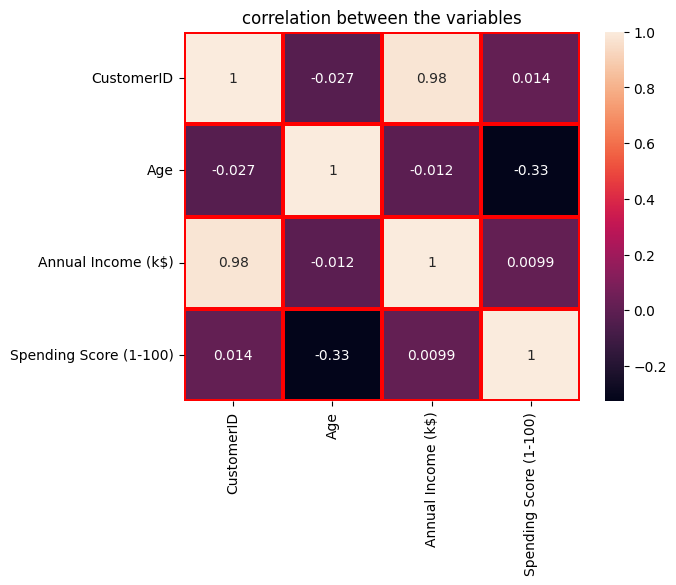

In [ ]:
sns.heatmap(corr_mat,annot=True,linewidths=1.5,linecolor="red")
plt.title("correlation between the variables")
plt.show()

In [ ]:
df1=df.drop(["CustomerID"],axis=1)
df1.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


In [ ]:
#df1=pd.get_dummies(df1,columns=["Gender"])
#df1.head()

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

In [ ]:
dbs=DBSCAN(eps=10.5,min_samples=5).fit(df1)

In [ ]:
dbscan=df.copy()
dbscan.loc[:,"Cluster"]=dbs.labels_
dbscan.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,-1
1,2,21,15,81,0
2,3,20,16,6,-1
3,4,23,16,77,0
4,5,31,17,40,-1


In [ ]:
scan_clust=dbscan.groupby("Cluster").size().to_frame()
scan_clust.columns=["Dbscan_size"]
scan_clust

,Dbscan_size
Cluster,
-1,57
0,17
1,5
2,80
3,32
4,9


In [ ]:
out=dbscan[dbscan["Cluster"]==-1]
out

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,-1
2,3,20,16,6,-1
4,5,31,17,40,-1
6,7,35,18,6,-1
7,8,23,18,94,-1
8,9,64,19,3,-1
10,11,67,19,14,-1
11,12,35,19,99,-1
12,13,58,20,15,-1
14,15,37,20,13,-1


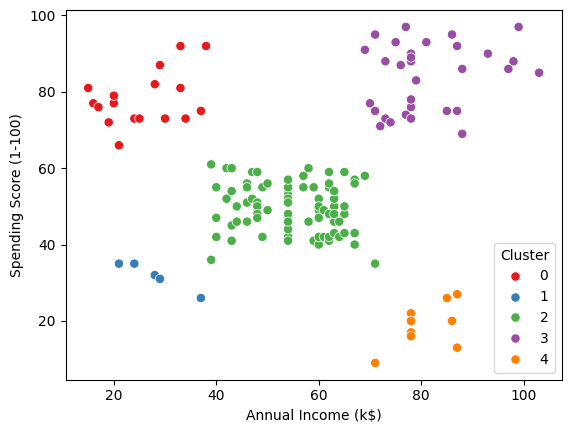

In [ ]:
ax=sns.scatterplot(x="Annual Income (k$)",y="Spending Score (1-100)",data=dbscan[dbscan["Cluster"]!=-1],hue="Cluster",palette="Set1",legend="full",s=45)